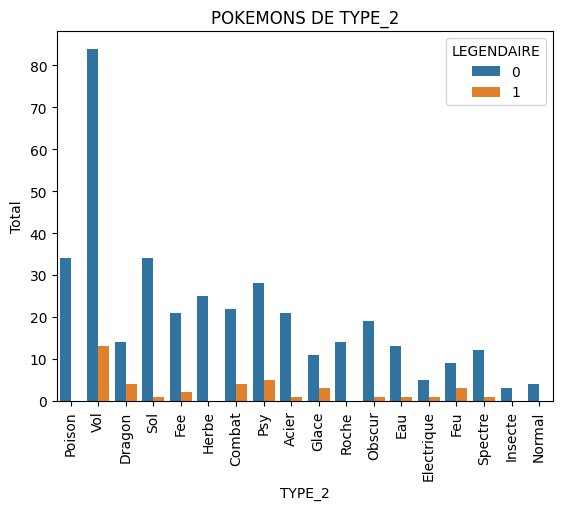

In [28]:
axe_X = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_2')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_2")
plt.show()


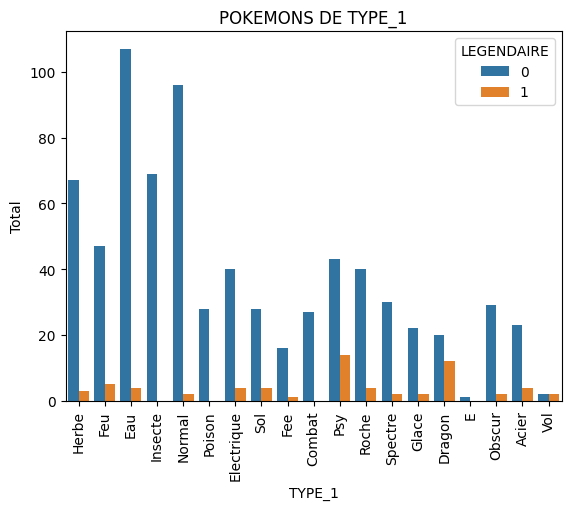

In [27]:
axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_1")
plt.show()


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Analyse statistique globale du dataset
nouveauPokedex.describe()


,NUMERO,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Premier_Pokemon,Second_Pokemon,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,63.856960,63.856960,127.541507,63.856960,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,32.925941,32.925941,11.397402,32.925941,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,3.000000,3.000000,92.000000,3.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,36.000000,36.000000,120.000000,36.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,62.000000,62.000000,128.000000,62.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,91.000000,91.000000,135.000000,91.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,152.000000,152.000000,164.000000,152.000000,0.984496


In [23]:
# Fusion du pokédex nettoyé avec les stats de combats
nouveauPokedex = nosPokemonsClean.merge(
    listeAAgreger,
    left_on='NUMERO',      # clé dans le pokédex
    right_index=True,      # clé = index de listeAAgreger (Pokemon_Gagnant)
    how='left'             # left join : on garde tous les pokémons du pokédex
)

nouveauPokedex.head(10)


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Premier_Pokemon,Second_Pokemon,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071
5,6,Reptincel,Feu,NaN,58,64,58,80,65,80,1,0,64.0,64.0,118.0,64.0,0.542373
6,7,Dracaufeu,Feu,Vol,78,84,78,109,85,100,1,0,115.0,115.0,133.0,115.0,0.864662
7,8,Mega Dracaufeu X,Feu,Dragon,78,130,111,130,85,100,1,0,119.0,119.0,139.0,119.0,0.856115
8,9,Mega Dracaufeu Y,Feu,Vol,78,104,78,159,115,100,1,0,114.0,114.0,135.0,114.0,0.844444
9,10,Carapuce,Eau,NaN,44,48,65,50,64,43,1,0,19.0,19.0,117.0,19.0,0.162393


In [22]:
# On crée une copie triée par numéro du Pokémon gagnant
listeAAgreger = nbVictoires.copy()
listeAAgreger = listeAAgreger.sort_index()

# On ajoute le nombre total de combats
listeAAgreger['NBR_COMBATS'] = nbPremiere['Pokemon_Gagnant'] + nbSeconde['Pokemon_Gagnant']

# On ajoute le nombre de victoires
listeAAgreger['NBR_VICTOIRES'] = nbVictoires['Premier_Pokemon']

# On calcule le pourcentage de victoires
listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = listeAAgreger['NBR_VICTOIRES'] / listeAAgreger['NBR_COMBATS']

listeAAgreger.head()


,Premier_Pokemon,Second_Pokemon,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
Pokemon_Gagnant,,,,,
1,37,37,133,37,0.278195
2,46,46,121,46,0.380165
3,89,89,132,89,0.674242
4,70,70,125,70,0.560000
5,55,55,112,55,0.491071


In [17]:
nbVictoires = combats.groupby("Pokemon_Gagnant").count()
nbVictoires.head()


,Premier_Pokemon,Second_Pokemon
Pokemon_Gagnant,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55


In [16]:
nbTotalCombats = nbPremiere + nbSeconde
nbTotalCombats.head()


,Pokemon_Gagnant,Premier_Pokemon,Second_Pokemon
Premier_Pokemon,,,
1,133,NaN,NaN
2,121,NaN,NaN
3,132,NaN,NaN
4,125,NaN,NaN
5,112,NaN,NaN


In [15]:
nbSeconde = combats.groupby("Second_Pokemon").count()
nbSeconde.head()


,Premier_Pokemon,Pokemon_Gagnant
Second_Pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62


In [14]:
nbPremiere = combats.groupby("Premier_Pokemon").count()
nbPremiere.head()


,Second_Pokemon,Pokemon_Gagnant
Premier_Pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50


In [13]:
combats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [12]:
combats.shape


(50000, 3)

In [11]:
combats.columns.values


array(['Premier_Pokemon', 'Second_Pokemon', 'Pokemon_Gagnant'],
      dtype=object)

In [10]:
combats = pd.read_csv("datas/combats.csv")
combats.head(10)


,Premier_Pokemon,Second_Pokemon,Pokemon_Gagnant
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [9]:
nosPokemonsClean["LEGENDAIRE"].unique()


array([0, 1])

In [8]:
nosPokemonsClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      799 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   NIVEAU_ATTAQUE           800 non-null    int64 
 6   NIVEAU_DEFENSE           800 non-null    int64 
 7   NIVEAU_ATTAQUE_SPECIALE  800 non-null    int64 
 8   NIVEAU_DEFENSE_SPECIALE  800 non-null    int64 
 9   VITESSE                  800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB


In [7]:
nosPokemonsClean.shape


(800, 12)

In [6]:
nosPokemonsClean = nosPokemons.copy()

nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("VRAI", 1)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("FAUX", 0)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].astype(int)

nosPokemonsClean.head()


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,0


In [5]:
nosPokemons.columns.values


array(['NUMERO', 'NOM', 'TYPE_1', 'TYPE_2', 'POINTS_DE_VIE',
       'NIVEAU_ATTAQUE', 'NIVEAU_DEFENSE', 'NIVEAU_ATTAQUE_SPECIALE',
       'NIVEAU_DEFENSE_SPECIALE', 'VITESSE', 'NOMBRE_GENERATIONS',
       'LEGENDAIRE'], dtype=object)

In [4]:
nosPokemons = pd.read_csv("datas/pokedex.csv")
nosPokemons.head(10)


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,NIVEAU_ATTAQUE,NIVEAU_DEFENSE,NIVEAU_ATTAQUE_SPECIALE,NIVEAU_DEFENSE_SPECIALE,VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salameche,Feu,NaN,39,52,43,60,50,65,1,FAUX
5,6,Reptincel,Feu,NaN,58,64,58,80,65,80,1,FAUX
6,7,Dracaufeu,Feu,Vol,78,84,78,109,85,100,1,FAUX
7,8,Mega Dracaufeu X,Feu,Dragon,78,130,111,130,85,100,1,FAUX
8,9,Mega Dracaufeu Y,Feu,Vol,78,104,78,159,115,100,1,FAUX
9,10,Carapuce,Eau,NaN,44,48,65,50,64,43,1,FAUX


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes
pd.set_option('future.no_silent_downcasting', True)


In [1]:
import sys
print(sys.executable)
print("🔥 Kernel opérationnel !")


/usr/local/bin/python
🔥 Kernel opérationnel !
